In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
angle = pd.read_excel('Angle.xls')
frequency = pd.read_excel('Frequency.xls')
voltage = pd.read_excel('Voltage Magnitude.xls')

# Loading Data

In [3]:
angle.head()

,Timestamp,BADARPUR:Voltage 1:Angle,BADARPUR:Voltage A:Angle,BADARPUR:Voltage B:Angle,BADARPUR:Voltage C:Angle
0,2021-09-11 06:12:16.840,-37.6615,-37.7951,-157.5272,82.3356
1,2021-09-11 06:12:16.880,-37.5420,-37.6748,-157.4100,82.4523
2,2021-09-11 06:12:16.920,-37.4278,-37.5562,-157.2879,82.5602
3,2021-09-11 06:12:16.960,-37.3012,-37.4359,-157.1624,82.6857
4,2021-09-11 06:12:17.000,-37.1925,-37.3227,-157.0500,82.8023


# Angle Analysis

<AxesSubplot:>

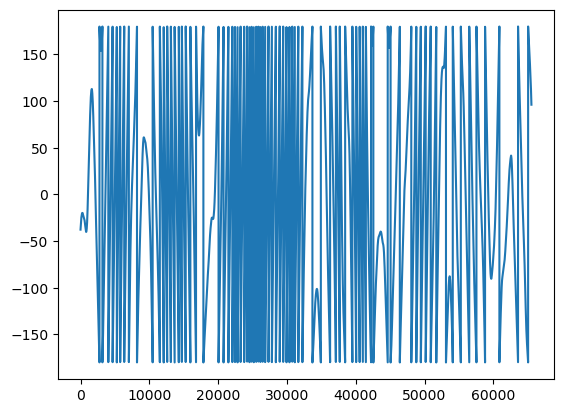

In [4]:
angle['BADARPUR:Voltage 1:Angle'].plot()


<AxesSubplot:>

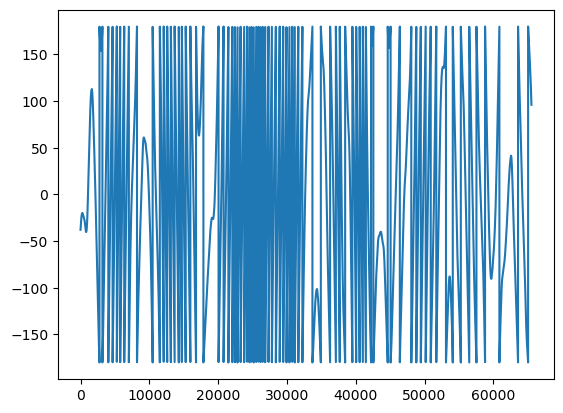

In [5]:
angle['BADARPUR:Voltage A:Angle'].plot()

<AxesSubplot:>

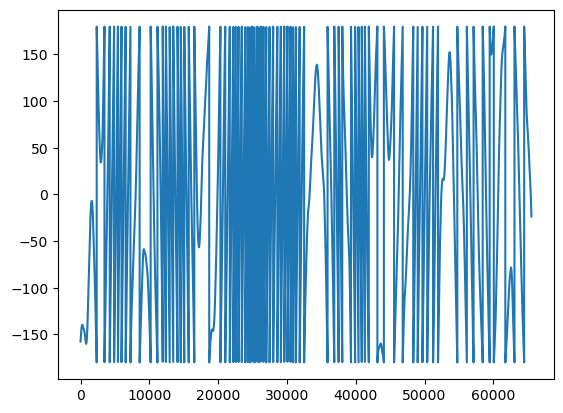

In [6]:
angle['BADARPUR:Voltage B:Angle'].plot()

<AxesSubplot:>

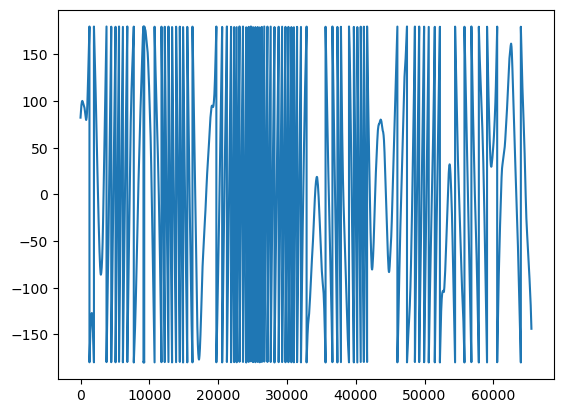

In [7]:
angle['BADARPUR:Voltage C:Angle'].plot()

In [27]:
angle.head()

,Timestamp,BADARPUR:Voltage 1:Angle,BADARPUR:Voltage A:Angle,BADARPUR:Voltage B:Angle,BADARPUR:Voltage C:Angle
0,2021-09-11 06:12:16.840,-37.6615,-37.7951,-157.5272,82.3356
1,2021-09-11 06:12:16.880,-37.5420,-37.6748,-157.4100,82.4523
2,2021-09-11 06:12:16.920,-37.4278,-37.5562,-157.2879,82.5602
3,2021-09-11 06:12:16.960,-37.3012,-37.4359,-157.1624,82.6857
4,2021-09-11 06:12:17.000,-37.1925,-37.3227,-157.0500,82.8023


In [28]:
angle1 = angle['BADARPUR:Voltage 1:Angle'].copy()
angleA = angle['BADARPUR:Voltage A:Angle'].copy()
angleB = angle['BADARPUR:Voltage B:Angle'].copy()
angleC = angle['BADARPUR:Voltage C:Angle'].copy()

In [12]:
##### code for denoising the data using kalman filter

In [29]:
def basic_filter(data, mode='rolling', window=262, threshold=3):
    """Basic Filter.
    
    Mark as outliers the points that are out of the interval:
    (mean - threshold * std, mean + threshold * std ).
    
    Parameters
    ----------
    data : pandas.Series
        The time series to filter.
    mode : str, optional, default: 'rolling'
        Whether to filter in rolling or expanding basis.
    window : int, optional, default: 262
        The number of periods to compute the mean and standard
        deviation.
    threshold : int, optional, default: 3
        The number of standard deviations above the mean.
        
    Returns
    -------
    series : pandas.DataFrame
        Original series and marked outliers.
    """
    msg = f"Type must be of pandas.Series but {type(data)} was passed."
    assert isinstance(data, pd.Series), msg
    
    series = data.copy()
    
    # rolling/expanding objects
    pd_object = getattr(series, mode)(window=window)
    mean = pd_object.mean()
    std = pd_object.std()
    
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std
    
    outliers = ~series.between(lower_bound, upper_bound)
    # fill false positives with 0
    outliers.iloc[:window] = np.zeros(shape=window)
    
    series = series.to_frame()
    series['outliers'] = np.array(outliers.astype('int').values)
    series.columns = ['Close', 'Outliers']
    
    return series

# Angle Cleaning

### Angle 1

In [30]:
cleaned_angle_1 = basic_filter(angle1)

In [55]:
cleaned_angle_1['Outliers'].unique()

array([0, 1])

<AxesSubplot:>

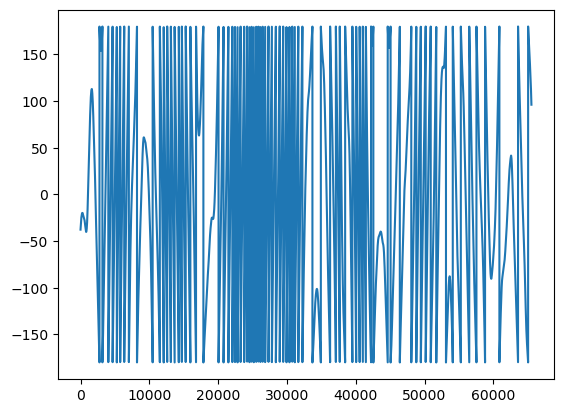

In [33]:
cleaned_angle_1['Close'].plot()

### Angle A

In [34]:
cleaned_angle_A = basic_filter(angleA)

<AxesSubplot:>

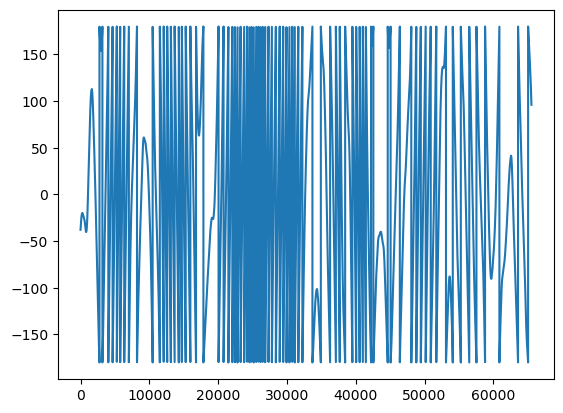

In [35]:
cleaned_angle_A['Close'].plot()

### Angle B

In [36]:
cleaned_angle_B = basic_filter(angleB)

In [57]:
cleaned_angle_B['Outliers'].unique()

array([0, 1])

<AxesSubplot:>

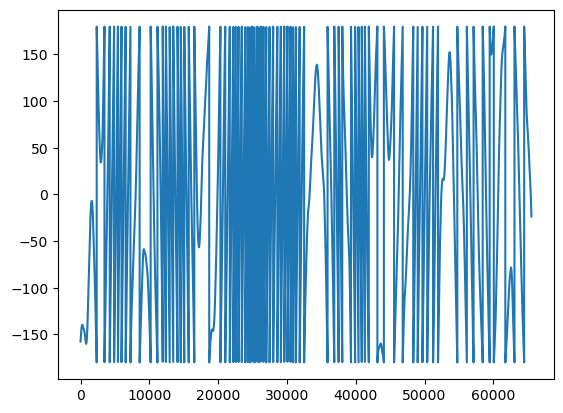

In [37]:
cleaned_angle_B['Close'].plot()

### Angle C

In [38]:
cleaned_angle_C = basic_filter(angleC)

In [58]:
cleaned_angle_C['Outliers'].unique()

array([0, 1])

<AxesSubplot:>

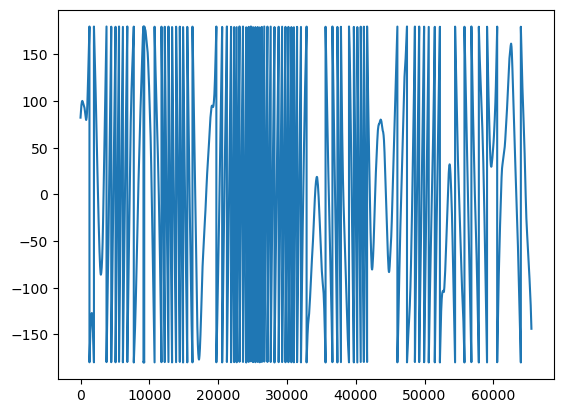

In [39]:
cleaned_angle_C['Close'].plot()

In [41]:
angle_noise_analysis = angle.copy()

In [42]:
angle_noise_analysis.head()

,Timestamp,BADARPUR:Voltage 1:Angle,BADARPUR:Voltage A:Angle,BADARPUR:Voltage B:Angle,BADARPUR:Voltage C:Angle
0,2021-09-11 06:12:16.840,-37.6615,-37.7951,-157.5272,82.3356
1,2021-09-11 06:12:16.880,-37.5420,-37.6748,-157.4100,82.4523
2,2021-09-11 06:12:16.920,-37.4278,-37.5562,-157.2879,82.5602
3,2021-09-11 06:12:16.960,-37.3012,-37.4359,-157.1624,82.6857
4,2021-09-11 06:12:17.000,-37.1925,-37.3227,-157.0500,82.8023


In [43]:
angle_noise_analysis['Noise 1'] = angle_noise_analysis['BADARPUR:Voltage 1:Angle'] - cleaned_angle_1['Close']
angle_noise_analysis['Noise A'] = angle_noise_analysis['BADARPUR:Voltage A:Angle'] - cleaned_angle_A['Close']
angle_noise_analysis['Noise B'] = angle_noise_analysis['BADARPUR:Voltage B:Angle'] - cleaned_angle_B['Close']
angle_noise_analysis['Noise C'] = angle_noise_analysis['BADARPUR:Voltage C:Angle'] - cleaned_angle_C['Close']

In [44]:
angle_noise_analysis.head()

,Timestamp,BADARPUR:Voltage 1:Angle,BADARPUR:Voltage A:Angle,BADARPUR:Voltage B:Angle,BADARPUR:Voltage C:Angle,Noise 1,Noise A,Noise B,Noise C
0,2021-09-11 06:12:16.840,-37.6615,-37.7951,-157.5272,82.3356,0.0,0.0,0.0,0.0
1,2021-09-11 06:12:16.880,-37.5420,-37.6748,-157.4100,82.4523,0.0,0.0,0.0,0.0
2,2021-09-11 06:12:16.920,-37.4278,-37.5562,-157.2879,82.5602,0.0,0.0,0.0,0.0
3,2021-09-11 06:12:16.960,-37.3012,-37.4359,-157.1624,82.6857,0.0,0.0,0.0,0.0
4,2021-09-11 06:12:17.000,-37.1925,-37.3227,-157.0500,82.8023,0.0,0.0,0.0,0.0


In [50]:
print(angle_noise_analysis['Noise 1'].unique())
print(angle_noise_analysis['Noise A'].unique())
print(angle_noise_analysis['Noise B'].unique())
print(angle_noise_analysis['Noise C'].unique())

[0.]
[0.]
[0.]
[0.]


## According to Kalman filter there is no noise in the signal